# Structuring data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
from glob import glob

In [2]:
female_path = glob("./data/crop/female_crop/*.png")
male_path = female = glob("./data/crop/male_crop/*.png")

In [3]:
path = female_path + male_path

Gets size of image.

In [4]:
def get_size(path):
    img = Image.open(path)
    return img.size[0]

In [5]:
get_size(path[0])

122

Makes dataframe with pandas.

In [6]:
dataframe = pd.DataFrame(data= path, columns=["path"])
dataframe.head()
dataframe.shape

(6059, 1)

In [7]:
dataframe["size"] = dataframe["path"].apply(get_size)
dataframe.head()

,path,size
0,./data/crop/female_crop/female_6653.png,122
1,./data/crop/female_crop/female_3869.png,182
2,./data/crop/female_crop/female_396.png,182
3,./data/crop/female_crop/female_4276.png,122
4,./data/crop/female_crop/female_5498.png,273


# EDA

In [8]:
dataframe.describe()

,size
count,6059.000000
mean,154.230896
std,71.600016
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

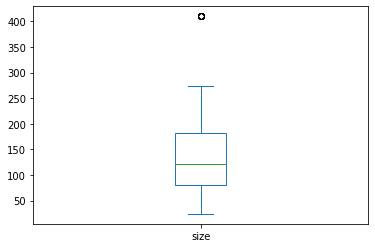

In [12]:
dataframe['size'].plot(kind = 'box')

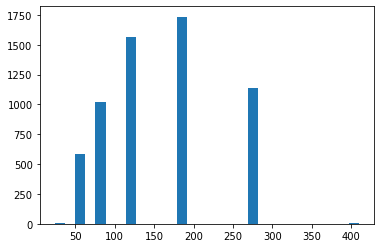

In [14]:
plt.hist(dataframe["size"], bins= 30)
plt.show()

Resize images to size 100 x 100 and remove the ones less than 54.

In [20]:
new_dataframe = dataframe[dataframe["size"] > 60]
new_dataframe

,path,size
0,./data/crop/female_crop/female_6653.png,122
1,./data/crop/female_crop/female_3869.png,182
2,./data/crop/female_crop/female_396.png,182
3,./data/crop/female_crop/female_4276.png,122
4,./data/crop/female_crop/female_5498.png,273
...,...,...
6054,./data/crop/male_crop/male_2372.png,122
6055,./data/crop/male_crop/male_6032.png,182
6056,./data/crop/male_crop/male_4869.png,182
6057,./data/crop/male_crop/male_4131.png,81


In [45]:
string = new_dataframe["path"][0]
print(get_gender(string))


female


In [49]:
def get_gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

female    0.592672
male      0.407328
Name: gender, dtype: float64


<AxesSubplot:>

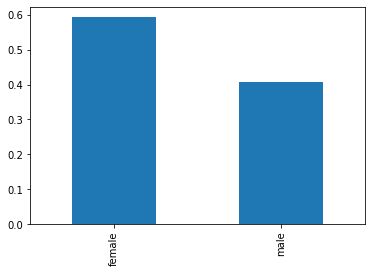

In [57]:
dataframe["gender"] = dataframe["path"].apply(get_gender)
print(dataframe["gender"].value_counts(normalize= True))
dataframe["gender"].value_counts(normalize= True).plot(kind = "bar")

In [59]:
new_dataframe["size"].min()

81